# Benson Challenges

In [2]:
from __future__ import division

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import seaborn as sns

%matplotlib inline

## Challenge 1

After downloading the the turnstile data from the MTA website, I use pd.read_csv to convert the csv to a dataframe.

In [3]:
df = pd.DataFrame()

files = ['turnstile_170916.txt',
         'turnstile_170909.txt',
         'turnstile_170902.txt',
         'turnstile_170826.txt',
         'turnstile_170819.txt']
for f in files:
    df2 = pd.read_csv(f)
    df2['FILE'] = f
    df = pd.concat([df, df2])

df[["C/A","UNIT","SCP","STATION"]].head()

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,FILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544,turnstile_170916.txt
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,turnstile_170916.txt
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,turnstile_170916.txt
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,turnstile_170916.txt
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,turnstile_170916.txt


In [4]:
df.columns = ['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'FILE']
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,FILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544,turnstile_170916.txt
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,turnstile_170916.txt
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,turnstile_170916.txt
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,turnstile_170916.txt
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,turnstile_170916.txt


In [5]:
len(df['STATION'].unique())

378

## Challenge 2

I concatenate the DATE and TIME column strings into a DATE_TIME string and use pd.to_datetime to convert it to the type datetime64.

In [6]:
df["DATE_TIME"] = df["DATE"] +" "+ df["TIME"]
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"], format='%m/%d/%Y %H:%M:%S')
df["DATE_TIME"].head()

0   2017-09-09 00:00:00
1   2017-09-09 04:00:00
2   2017-09-09 08:00:00
3   2017-09-09 12:00:00
4   2017-09-09 16:00:00
Name: DATE_TIME, dtype: datetime64[ns]

## Challenge 3

In [7]:
df['DIFFS'] = (df.groupby(["CA", "UNIT", "SCP", "STATION"])["ENTRIES"]
                 .transform(lambda x: x.diff()))

df = df[(df.DIFFS < 100000) & (df.DIFFS >0)]
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,FILE,DATE_TIME,DIFFS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,turnstile_170916.txt,2017-09-09 04:00:00,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,turnstile_170916.txt,2017-09-09 08:00:00,17.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,turnstile_170916.txt,2017-09-09 12:00:00,80.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,turnstile_170916.txt,2017-09-09 16:00:00,227.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,20:00:00,REGULAR,6319491,2138779,turnstile_170916.txt,2017-09-09 20:00:00,279.0


In [8]:
df_day_count = df.groupby(['CA','UNIT','SCP','STATION','DATE'])['DIFFS'].sum()
df_day_count.head()

CA    UNIT  SCP       STATION  DATE      
A002  R051  02-00-00  59 ST    08/12/2017     565.0
                               08/13/2017     529.0
                               08/14/2017    1224.0
                               08/15/2017    1351.0
                               08/16/2017    1399.0
Name: DIFFS, dtype: float64

## Challenge 4

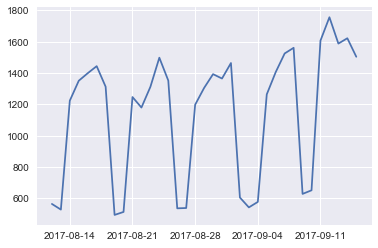

In [9]:
df_day_count = df_day_count.reset_index()
df_day_count['DATE'] = pd.to_datetime(df_day_count.DATE, format='%m/%d/%Y') 
df_day_count_ex = df_day_count[(df_day_count.SCP == '02-00-00')&
                               (df_day_count.UNIT == 'R051')&
                               (df_day_count.STATION == '59 ST') &
                               (df_day_count.CA == 'A002')]

plt.plot(df_day_count_ex.DATE, df_day_count_ex.DIFFS)

## Challenge 5

In [10]:
df_day_count = df_day_count.groupby(['CA','UNIT','STATION','DATE']).sum()
df_day_count.head()

DIFFS
CA   UNIT STATION DATE               
A002 R051 59 ST   2017-08-12   5558.0
                  2017-08-13   5868.0
                  2017-08-14  11985.0
                  2017-08-15  13111.0
                  2017-08-16  13362.0

## Challenge 6

In [11]:
df_day_count = df_day_count.groupby(['STATION','DATE']).sum()
df_day_count.head()

DIFFS
STATION DATE               
1 AV    2017-08-12  12183.0
        2017-08-13  13613.0
        2017-08-14  17693.0
        2017-08-15  17410.0
        2017-08-16  19690.0

## Challenge 7

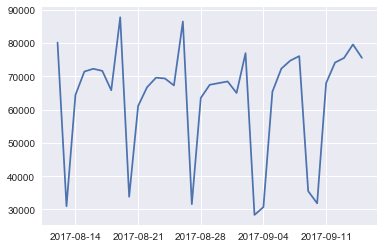

In [10]:
df_day_count = df_day_count.reset_index()
df_day_count_ex = df_day_count[df_day_count.STATION == '59 ST']
plt.plot(df_day_count_ex.DATE, df_day_count_ex.DIFFS)


## Challenge 8

In [13]:
df_day_count2 = df.groupby(['STATION','DATE','FILE'])['DIFFS'].sum().reset_index()
df_day_count2['DATE'] = (pd.to_datetime(df_day_count2.DATE, format='%m/%d/%Y')
                           .dt.weekday
                           .sort_values())

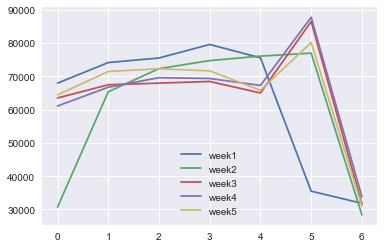

In [14]:
week = 0
days = ['Monday',
       'Tuesday',
       'Wednesday',
       'Thursday',
       'Friday',
       'Saturday',
       'Sunday']
for f in files:
    week+=1
    df_day_count_plot = df_day_count2[(df_day_count2.STATION == '59 ST') &
                                      (df_day_count2.FILE == f)].sort_values('DATE')
    
    plt.plot(df_day_count_plot.DATE, df_day_count_plot.DIFFS, label='week' + str(week))
    plt.legend()
    

## Challenge 9

In [15]:
df_total_riders = (df.groupby(['STATION'])['DIFFS']
                     .sum()
                     .sort_values(ascending = False))
df_total_riders.head()

STATION
34 ST-PENN STA     4471232.0
GRD CNTRL-42 ST    4216779.0
34 ST-HERALD SQ    3796269.0
23 ST              3275183.0
42 ST-PORT AUTH    3176137.0
Name: DIFFS, dtype: float64

## Challenge 10

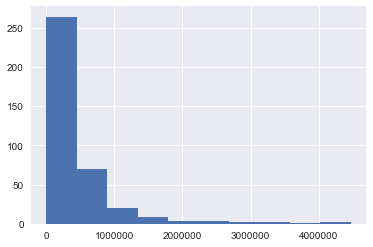

In [16]:
df_total_riders.hist()


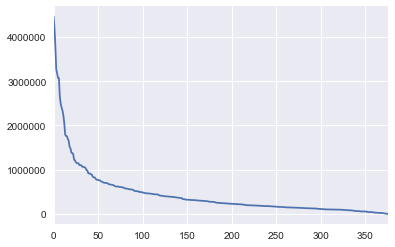

In [17]:
df_total_riders.reset_index()['DIFFS'].plot()